In [16]:
import pandas as pd
from g2t.graph2topictm import Graph2TopicTM

url = 'https://raw.githubusercontent.com/zfz/twitter_corpus/master/full-corpus.csv'
df = pd.read_csv(url)
data = df['TweetText'].tolist()

tm = Graph2TopicTM(dataset=data, 
                embedding='princeton-nlp/unsup-simcse-bert-base-uncased')
prediction = tm.train()
topics = tm.get_topics()
print(f'Topics: {topics}')

Initialize G2T with num_topics=10, embedding=princeton-nlp/unsup-simcse-bert-base-uncased, dim_size=5, graph_method=greedy_modularity
---creating embedding---


5113it [28:32,  2.98it/s]


---Detect 45 Topcis---
====== Using TFIDF_IDFi ======
Topics: {0: [('microsoft', 0.017702493822671646), ('http', 0.007475349221954587), ('co', 0.007377291940981615), ('yahoo', 0.00586455151697225), ('ballmer', 0.005781545126688348), ('the', 0.005100692944545437), ('cloud', 0.004997667984045874), ('to', 0.00492818700230438), ('lucky', 0.004452627726867547), ('windows', 0.004202651279366346)], 1: [('twitter', 0.00979132182174799), ('de', 0.008090328296259625), ('que', 0.007871440870422006), ('en', 0.007723036446004268), ('el', 0.007708986225553185), ('mas', 0.0059288160392725305), ('jajaja', 0.00574592942397043), ('la', 0.005381873261895436), ('para', 0.004859900627940304), ('no', 0.00471034397778321)], 2: [('twitter', 0.016242526829588027), ('my', 0.008914630791867398), ('on', 0.006731180430805001), ('lol', 0.0059173447841028145), ('retweets', 0.005848129108982252), ('bitch', 0.0055759798667912325), ('you', 0.005288315827796464), ('don', 0.005027404744024548), ('it', 0.00497240091034024

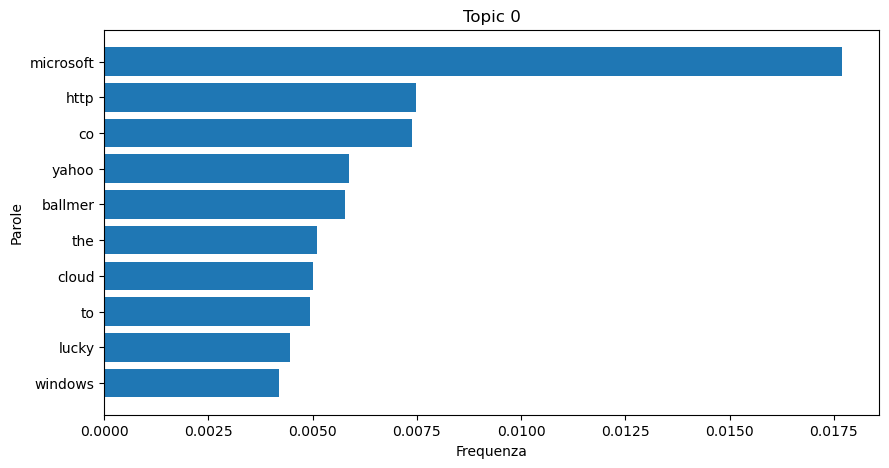

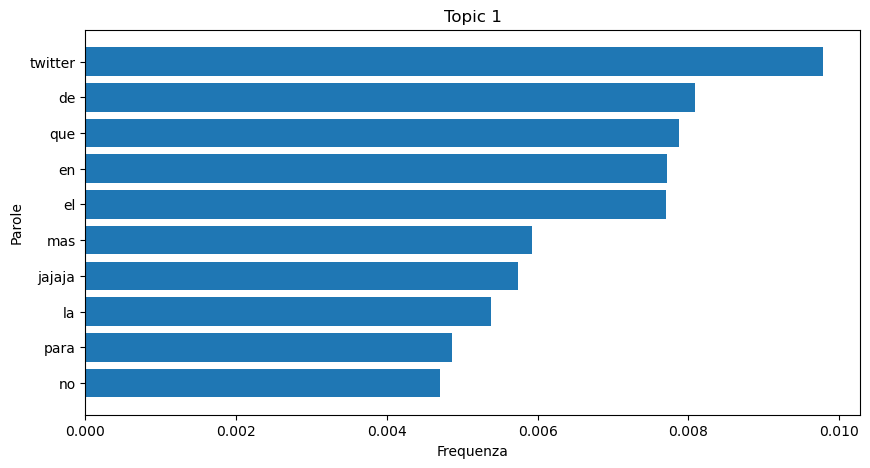

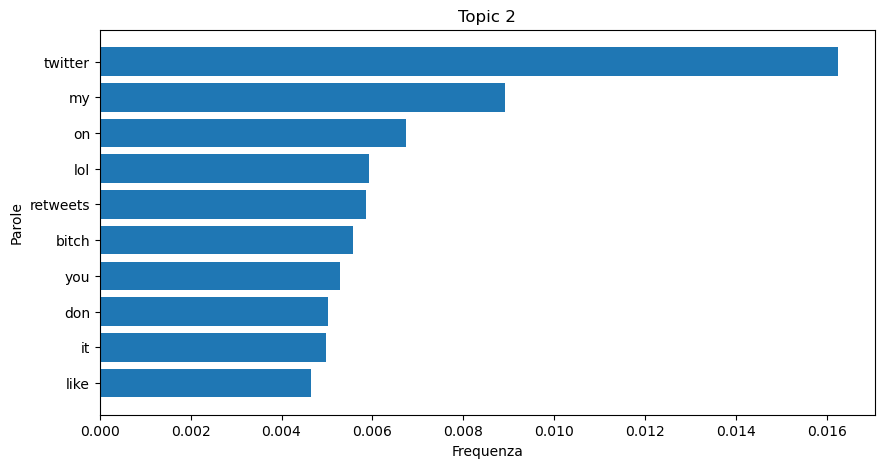

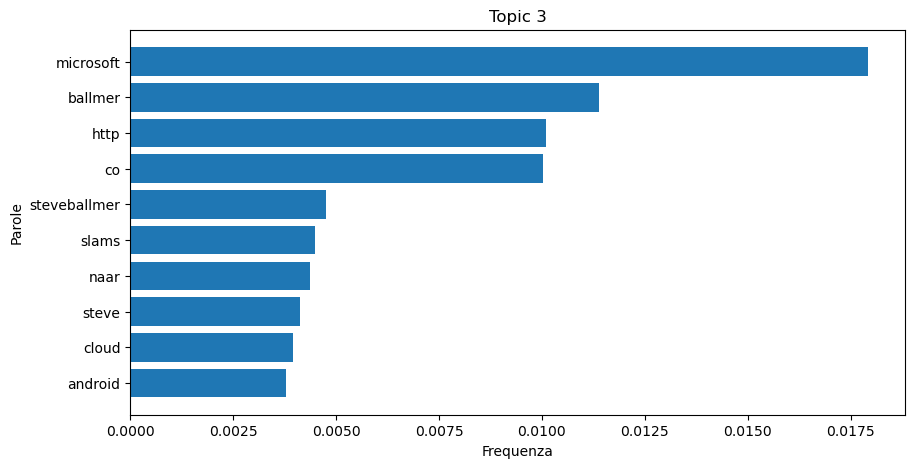

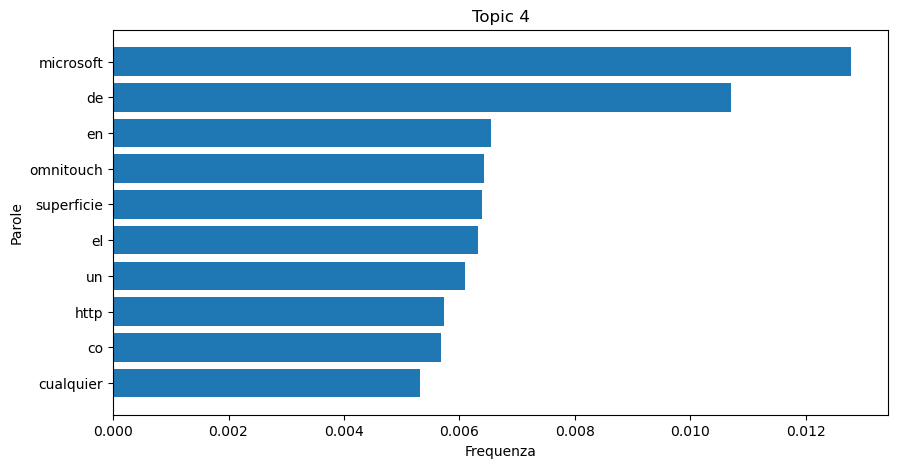

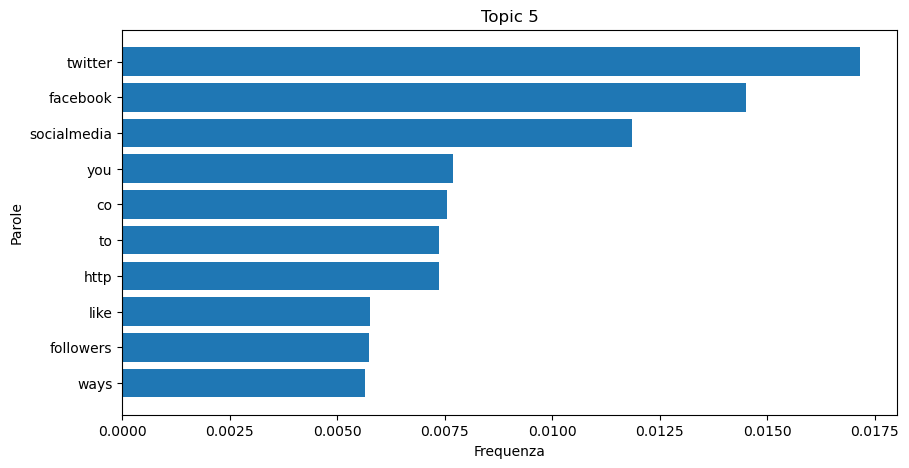

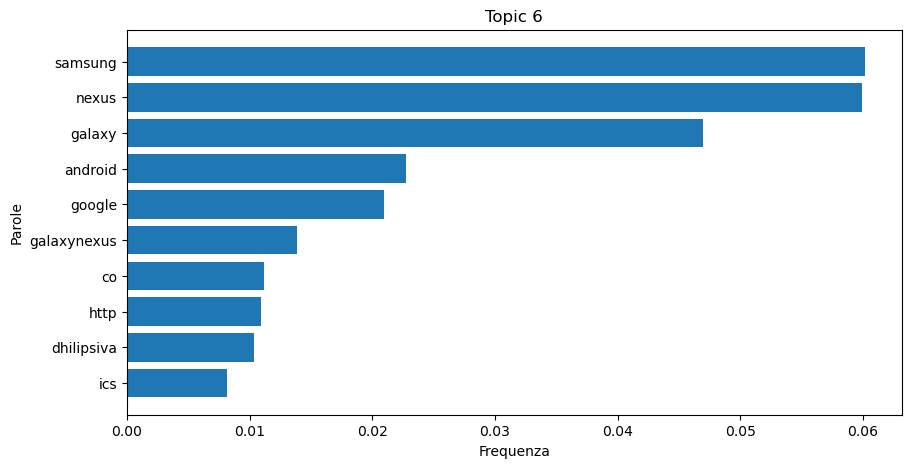

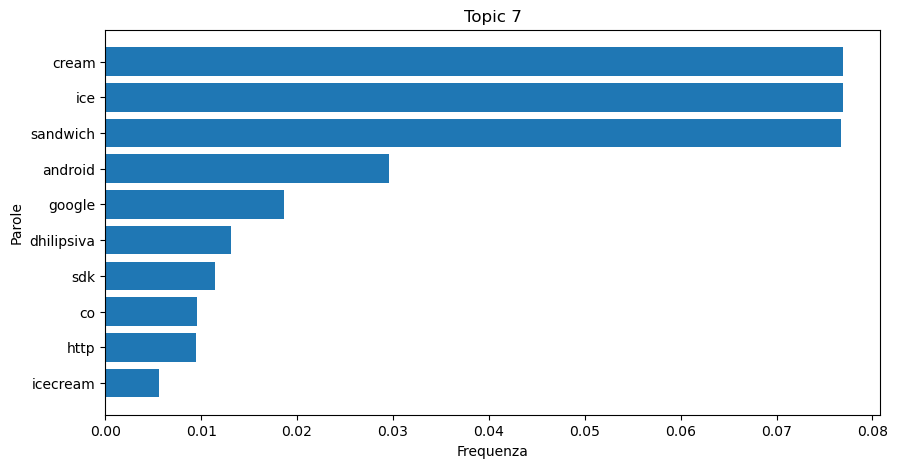

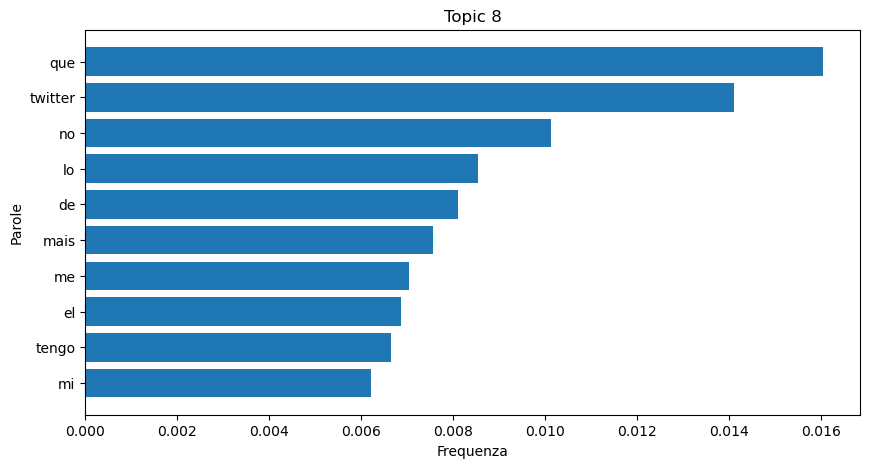

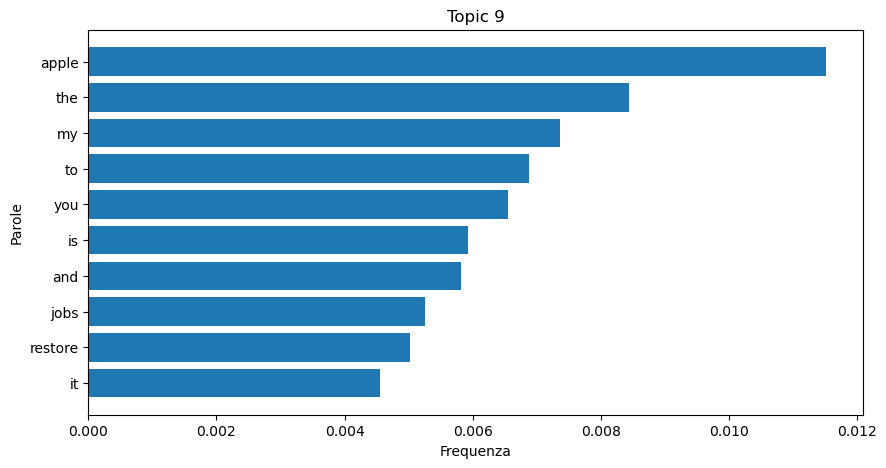

In [30]:
import matplotlib.pyplot as plt
# Visualizzare i topic in un grafico a barre
def plot_topics(topics, top_n=10):
    for topic_id, topic_words in topics.items():
        # Mostra solo i primi N topic
        words = [word for word, _ in topic_words[:top_n]]
        freqs = [freq for _, freq in topic_words[:top_n]]
        
        plt.figure(figsize=(10, 5))
        plt.barh(words, freqs)
        plt.title(f'Topic {topic_id}')
        plt.xlabel('Frequenza')
        plt.ylabel('Parole')
        plt.gca().invert_yaxis()  # Inverte l'asse y per avere il topic più importante in alto
        plt.show()

# Esegui la funzione per visualizzare i topic
plot_topics(topics)